# Part 3: Let's Do Machine Learning

We got our dataset with WURFL values from the previous phase.


In [1]:
import json
import numpy as np
import pandas as pd
import gzip
import csv

data = pd.read_csv('data_only_wurflcapas_in_tsv_format.tsv.gz', compression='gzip', index_col=0, sep='\t', quoting=csv.QUOTE_NONE)


In [2]:
data.head(2)

,Platform-User-Click,brand_name,model_name,release_date,release_msrp,is_smarttv,is_tablet,is_mobile,is_smartphone,complete_device_name,advertised_device_os,advertised_device_os_version,form_factor,is_full_desktop,OS_and_Ver,year,month
0,0,HTC,U-3u,2017_may,700,False,False,True,True,HTC U-3u (U11),Android,9,Smartphone,False,Android 9,2017,may
1,0,Google,Chrome,2019_december,0,False,False,False,False,Google Chrome,Windows,10,Desktop,True,Windows 10,2019,december


In [3]:
# List of columns

data.columns

Index(['Platform-User-Click', 'brand_name', 'model_name', 'release_date',
       'release_msrp', 'is_smarttv', 'is_tablet', 'is_mobile', 'is_smartphone',
       'complete_device_name', 'advertised_device_os',
       'advertised_device_os_version', 'form_factor', 'is_full_desktop',
       'OS_and_Ver', 'year', 'month'],
      dtype='object')

## Looking at overall description of the dataset

In [4]:
data.describe()

,Platform-User-Click,release_msrp,year
count,999962.000000,999962.000000,999962.000000
mean,0.012011,366.729046,2017.391866
std,0.108937,442.417092,2.805954
min,0.000000,0.000000,1994.000000
25%,0.000000,0.000000,2017.000000
50%,0.000000,190.000000,2018.000000
75%,0.000000,575.000000,2019.000000
max,1.000000,7999.000000,2020.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Platform-User-Click           999962 non-null  int64 
 1   brand_name                    994801 non-null  object
 2   model_name                    993669 non-null  object
 3   release_date                  999962 non-null  object
 4   release_msrp                  999962 non-null  int64 
 5   is_smarttv                    999962 non-null  bool  
 6   is_tablet                     999962 non-null  bool  
 7   is_mobile                     999962 non-null  bool  
 8   is_smartphone                 999962 non-null  bool  
 9   complete_device_name          994801 non-null  object
 10  advertised_device_os          988154 non-null  object
 11  advertised_device_os_version  972059 non-null  object
 12  form_factor                   999962 non-null  object
 13 

## Machine Learning

We can start thinking in terms of Machine Learning and Artificial Intelligence now. Certain features are safe to remove for sake of getting a simpler dataset.

WURFL's `complete_device_name` has lower cardinality than the `User-Agent` string, but still high enough that it won't help in a (Machine Learning) regression model, so we can drop the column for now.

In [6]:
data.drop(['complete_device_name'], axis=1, inplace=True)

Columns such as `is_smarttv`,`is_tablet`,`is_smartphone` and `is_full_desktop` can be dropped as we will create dummy variables from One-Hot encoding out of `form_factor`.

In [7]:
data.drop(['is_smarttv','is_tablet','is_smartphone','is_full_desktop'], axis=1, inplace=True)

As we have extracted year and month from the `release_date` column, we can remove it. 'year' and 'month' will do.

In [8]:
data.drop(['release_date'], axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Platform-User-Click           999962 non-null  int64 
 1   brand_name                    994801 non-null  object
 2   model_name                    993669 non-null  object
 3   release_msrp                  999962 non-null  int64 
 4   is_mobile                     999962 non-null  bool  
 5   advertised_device_os          988154 non-null  object
 6   advertised_device_os_version  972059 non-null  object
 7   form_factor                   999962 non-null  object
 8   OS_and_Ver                    999962 non-null  object
 9   year                          999962 non-null  int64 
 10  month                         999962 non-null  object
dtypes: bool(1), int64(3), object(7)
memory usage: 84.9+ MB


## Reducing Cardinality

As we will need to fo one-hot encoding on categorical values, let's diminish the cardinality of common features. We will use the power of Numpy and `np.where()` for this. Essentially, all categories that do not account for at least 10% of the entries in the respective columns are consolidated under `Other`.

In [10]:
data['OS_and_Ver'].value_counts()[0:20]

Windows 10       197777
Android 10       175328
Android 9        126174
Android 8.1.0     56765
iOS 13.7          49470
Windows 7         43310
iOS 14.0.1        43170
Android 8.0.0     25597
Android 7.0       23537
Android 6.0.1     23413
Android 5.1.1     13415
Linux             13395
iOS 14.0          13171
Android 7.1.1     12360
                  11808
iOS 13.6.1        11405
Android 6.0       10869
macOS 10.15.7      9741
Windows 8.1        9547
macOS 10.15.4      9374
Name: OS_and_Ver, dtype: int64

In [11]:
# # needed this for a bit of testing with dummy data before "attacking" the real data
# cat_cols = ['brand_name','model_name', 'OS_and_Ver']
# thresholds = [2,2,2]
# data2 = data[cat_cols].copy()


# for idx,cat_col in enumerate(cat_cols):
#     data2[cat_col].fillna("None",inplace=True)
#     series = pd.value_counts(data2[cat_col])
#     mask = (series/series.sum() * 100).lt(thresholds[idx])
#     data2[cat_col] = np.where(data2[cat_col].isin(series[mask].index),'Other',data2[cat_col])

In [12]:
# # this will display multiple outputs. Cool, eh?
# from IPython.display import display
# display(data2['brand_name'].unique())
# display(data2['model_name'].unique())
# display(data2['OS_and_Ver'].unique())

```array(['Other', 'Google', 'Xiaomi', 'Apple', 'Mozilla', 'Samsung',
       'Huawei', 'Microsoft', 'Vivo', 'OPPO'], dtype=object)
array(['Other', 'Chrome', 'iPhone', 'Firefox', 'Edge', 'Safari'],
      dtype=object)
array(['Android 9', 'Windows 10', 'Android 7.0', 'Android 10',
       'iOS 14.0.1', 'Windows 7', 'Other', 'iOS 13.7', 'Android 8.0.0',
       'Android 8.1.0', 'Android 6.0.1'], dtype=object)```

In [13]:
cat_cols = ['brand_name','model_name', 'OS_and_Ver']
thresholds = [2,2,2]
for idx,cat_col in enumerate(cat_cols):
    data[cat_col].fillna("None",inplace=True)
    series = pd.value_counts(data[cat_col])
    mask = (series/series.sum() * 100).lt(thresholds[idx])
    data[cat_col] = np.where(data[cat_col].isin(series[mask].index),'Other',data[cat_col])

In [14]:
data['brand_name'].unique()

array(['Other', 'Google', 'Xiaomi', 'Apple', 'Mozilla', 'Samsung',
       'Huawei', 'Microsoft', 'Vivo', 'OPPO'], dtype=object)

In [15]:
data['model_name'].unique()

array(['Other', 'Chrome', 'iPhone', 'Firefox', 'Edge', 'Safari'],
      dtype=object)

In [16]:
data['OS_and_Ver'].unique()

array(['Android 9', 'Windows 10', 'Android 7.0', 'Android 10',
       'iOS 14.0.1', 'Windows 7', 'Other', 'iOS 13.7', 'Android 8.0.0',
       'Android 8.1.0', 'Android 6.0.1'], dtype=object)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Platform-User-Click           999962 non-null  int64 
 1   brand_name                    999962 non-null  object
 2   model_name                    999962 non-null  object
 3   release_msrp                  999962 non-null  int64 
 4   is_mobile                     999962 non-null  bool  
 5   advertised_device_os          988154 non-null  object
 6   advertised_device_os_version  972059 non-null  object
 7   form_factor                   999962 non-null  object
 8   OS_and_Ver                    999962 non-null  object
 9   year                          999962 non-null  int64 
 10  month                         999962 non-null  object
dtypes: bool(1), int64(3), object(7)
memory usage: 84.9+ MB


In [18]:
data.drop(['advertised_device_os','advertised_device_os_version'], axis=1, inplace=True)

We have `year` and `month`. Let's turn that into a nice numeric feature that indicates the age of a device in days. 

In [19]:
## Create delta assuming first day of each month

In [20]:
data['year'].unique()

array([2017, 2019, 2020, 2014, 2018, 2016, 2008, 2015, 2013, 2012, 1994,
       2007, 2002, 2000, 2011, 2010, 2006, 2009, 2001, 2003, 2005],
      dtype=int64)

In [21]:
data['month'].unique()

array(['may', 'december', 'january', 'august', 'september', 'june',
       'november', 'april', 'october', 'march', 'july', 'february'],
      dtype=object)

In [22]:
data['device_age'] = pd.datetime.now() - pd.to_datetime(data['year'].astype(str)  + data['month'], format='%Y%B')

<ipython-input-22-e25e87eaba88>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['device_age'] = pd.datetime.now() - pd.to_datetime(data['year'].astype(str)  + data['month'], format='%Y%B')


In [23]:
data['device_age'] = data['device_age'].dt.days

In [24]:
data.head(5)

,Platform-User-Click,brand_name,model_name,release_msrp,is_mobile,form_factor,OS_and_Ver,year,month,device_age
0,0,Other,Other,700,True,Smartphone,Android 9,2017,may,1396
1,0,Google,Chrome,0,False,Desktop,Windows 10,2019,december,452
2,0,Xiaomi,Other,148,True,Smartphone,Android 9,2019,january,786
3,0,Other,Other,156,True,Smartphone,Android 7.0,2017,august,1304
4,0,Xiaomi,Other,254,True,Smartphone,Android 10,2019,september,543


Now we can remove the `year` and `month` column as we have created the `device_age` column

In [25]:
data = data.drop(['year','month'],axis=1)

In [26]:
data.head(5)

,Platform-User-Click,brand_name,model_name,release_msrp,is_mobile,form_factor,OS_and_Ver,device_age
0,0,Other,Other,700,True,Smartphone,Android 9,1396
1,0,Google,Chrome,0,False,Desktop,Windows 10,452
2,0,Xiaomi,Other,148,True,Smartphone,Android 9,786
3,0,Other,Other,156,True,Smartphone,Android 7.0,1304
4,0,Xiaomi,Other,254,True,Smartphone,Android 10,543


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Platform-User-Click  999962 non-null  int64 
 1   brand_name           999962 non-null  object
 2   model_name           999962 non-null  object
 3   release_msrp         999962 non-null  int64 
 4   is_mobile            999962 non-null  bool  
 5   form_factor          999962 non-null  object
 6   OS_and_Ver           999962 non-null  object
 7   device_age           999962 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 62.0+ MB


## One-Hot Encoding

Time to turn our catecorical data into sparse matrices of `0`s and `1`s. 

In [28]:
df_coded = pd.get_dummies(data)

In [29]:
df_coded.columns

Index(['Platform-User-Click', 'release_msrp', 'is_mobile', 'device_age',
       'brand_name_Apple', 'brand_name_Google', 'brand_name_Huawei',
       'brand_name_Microsoft', 'brand_name_Mozilla', 'brand_name_OPPO',
       'brand_name_Other', 'brand_name_Samsung', 'brand_name_Vivo',
       'brand_name_Xiaomi', 'model_name_Chrome', 'model_name_Edge',
       'model_name_Firefox', 'model_name_Other', 'model_name_Safari',
       'model_name_iPhone', 'form_factor_Desktop', 'form_factor_Feature Phone',
       'form_factor_Other Mobile', 'form_factor_Other Non-Mobile',
       'form_factor_Robot', 'form_factor_Smart-TV', 'form_factor_Smartphone',
       'form_factor_Tablet', 'OS_and_Ver_Android 10',
       'OS_and_Ver_Android 6.0.1', 'OS_and_Ver_Android 7.0',
       'OS_and_Ver_Android 8.0.0', 'OS_and_Ver_Android 8.1.0',
       'OS_and_Ver_Android 9', 'OS_and_Ver_Other', 'OS_and_Ver_Windows 10',
       'OS_and_Ver_Windows 7', 'OS_and_Ver_iOS 13.7', 'OS_and_Ver_iOS 14.0.1'],
      dtype='object')

In [30]:
df_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Platform-User-Click           999962 non-null  int64
 1   release_msrp                  999962 non-null  int64
 2   is_mobile                     999962 non-null  bool 
 3   device_age                    999962 non-null  int64
 4   brand_name_Apple              999962 non-null  uint8
 5   brand_name_Google             999962 non-null  uint8
 6   brand_name_Huawei             999962 non-null  uint8
 7   brand_name_Microsoft          999962 non-null  uint8
 8   brand_name_Mozilla            999962 non-null  uint8
 9   brand_name_OPPO               999962 non-null  uint8
 10  brand_name_Other              999962 non-null  uint8
 11  brand_name_Samsung            999962 non-null  uint8
 12  brand_name_Vivo               999962 non-null  uint8
 13  brand_name_Xia

In [31]:
df_coded['Platform-User-Click'].value_counts()

0    987951
1     12011
Name: Platform-User-Click, dtype: int64

In [32]:
X = df_coded.drop('Platform-User-Click',axis=1)  # Seperating the target and the rest
y = df_coded['Platform-User-Click']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

In [34]:
y_train.value_counts(normalize=True)*100

0    98.798887
1     1.201113
Name: Platform-User-Click, dtype: float64

In [35]:
y_test.value_counts()

0    246988
1      3003
Name: Platform-User-Click, dtype: int64

In [36]:
y_test.value_counts(normalize=True)*100

0    98.798757
1     1.201243
Name: Platform-User-Click, dtype: float64

In [37]:
# # load library
# from sklearn.svm import SVC

# # we can add class_weight='balanced' to add panalize mistake
# svc_model = SVC(class_weight='balanced', probability=True)

# svc_model.fit(X_train, y_train)

# svc_predict = svc_model.predict(X_test)# check performance
# print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
# print('Accuracy score:',accuracy_score(y_test, svc_predict))
# print('F1 score:',f1_score(y_test, svc_predict))

In [38]:
# #Logistic Regression with only feedback columns
# from sklearn.linear_model import LogisticRegression #importing logistic regression

# lr = LogisticRegression()

# lr.fit(X_train, y_train)

# pred = lr.predict(X_test)  # Predictions from logistic regression
# score1 = lr.score(X_test, y_test)
# score1

In [39]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score1 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree accuracy score: {score1*100}")

Decision tree accuracy score: 98.8011568416463


In [40]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
print('ROCAUC score:',roc_auc_score(y_test, pred)*100)
print('Accuracy score:',accuracy_score(y_test, pred)*100)
print('F1 score:',f1_score(y_test, pred)*100)

ROCAUC score: 50.0
Accuracy score: 98.8011568416463
F1 score: 0.0


98% accuracy here may seem amazing, but be very careful here. This is an imbalanced dataset, i.e. always predicing 0 will give you high accuracy, but won't be very useful for us.

But there is more data that the decision tree can give us, notably how important each feature is:

In [41]:
#Decision Tree 
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False) * 100

release_msrp                    68.940331
device_age                      21.485733
OS_and_Ver_Android 10            1.621118
is_mobile                        1.123924
OS_and_Ver_Other                 1.123178
brand_name_Other                 0.938168
OS_and_Ver_Android 9             0.695763
form_factor_Smartphone           0.557547
brand_name_Huawei                0.471453
brand_name_Samsung               0.411005
brand_name_Apple                 0.382202
form_factor_Tablet               0.319834
brand_name_OPPO                  0.274370
OS_and_Ver_Android 8.1.0         0.241213
brand_name_Vivo                  0.212323
OS_and_Ver_Windows 10            0.189347
OS_and_Ver_iOS 14.0.1            0.173338
brand_name_Xiaomi                0.151308
OS_and_Ver_iOS 13.7              0.119413
OS_and_Ver_Android 6.0.1         0.096777
OS_and_Ver_Android 8.0.0         0.095872
model_name_Firefox               0.075758
brand_name_Google                0.074003
OS_and_Ver_Android 7.0           0

What we have here is a breakthrough. We know that `release_msrp` and `device_age` are the only two features that really make a difference. This is incredibly useful knowledge. Building a `RandomForestClassifier`, for example is a CPU intensive and time-consuming activity when we have a lot of data with a lot of features. If we can reduce our features to only two, then things get considerably easier (and faster).

**Note:**: *A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.*



In [42]:
# We can work on a subset of our data, Hurra!
df_small = df_coded[['device_age','release_msrp','Platform-User-Click']]

Xs = df_small[['device_age','release_msrp']]
ys = df_small['Platform-User-Click']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    Xs, ys, stratify=ys, random_state=42
)

In [43]:
from IPython.display import display
display(Xs_test.head())
display(ys_test.head())

,device_age,release_msrp
835874,1822,899
513668,696,237
846072,1426,750
753692,452,0
235925,1365,1229


835874    0
513668    0
846072    1
753692    0
235925    0
Name: Platform-User-Click, dtype: int64

Let's build a `RandomForestClassifier`, but let's be a little bit smart about it. If we were to train our model by giving all data the same importance, we would end up with a very accurate classifier, one that always predicts `0` when asked, just like our Decision Tree above did. That wouldn't be very useful. RandomForest have a nice feature. You can instruct the classifier to give certain data (i.e. classes) more importnace (i.e. a bigger weight) when building the model.

This is exactly what we are going to do in the code below. We are essentially telling Sklearn to give our `1`s way more importance than our `0`s (90 times more to be exact.

In [44]:
from sklearn.ensemble import RandomForestClassifier

# class_weight is the key here
rfs = RandomForestClassifier(n_jobs=3, class_weight={0: 1, 1: 90})

rfs.fit(Xs_train, ys_train)

score2 = rfs.score(Xs_test, ys_test)

print(f'Random Forest accuracy score = {score2}*100')

Random Forest accuracy score = 0.5137184938657792*100


In [45]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
rfs_predict = rfs.predict(Xs_test)# check performance
print('ROCAUC score:',roc_auc_score(ys_test, rfs_predict)*100)
print('Accuracy score:',accuracy_score(ys_test, rfs_predict)*100)
print('F1 score:',f1_score(ys_test, rfs_predict)*100)

ROCAUC score: 62.46250631807825
Accuracy score: 51.371849386577914
F1 score: 3.519047619047618


The accuracy score has now dropped to 51% while DecisionTreeClassifier achieved 98%. This was to be expected, as we asked our model to overestimate `1`s. Let's do a bit of DataViz.
Let's generate a few hundreds datapoints to feed to our classifiers to map its behavior visually.

In [46]:
wk = [i for i in range(5,1400, 1)]
pr = [i for i in range(50, 1400,25)]
pr = pr * 800
pr = pr[0:len(wk)]
zp =zip(wk,pr) # zipped
#[ [a[0],a[1]] for a in list(zp)]   # list comprehension to get a two-dimensional array
mytestdata = [ [a[0],a[1]] for a in list(zp)]  

In [47]:
# Load the example dataset
df1 = pd.DataFrame(mytestdata, columns =['Age', 'Price']) 
df2 = pd.DataFrame(rfs.predict(df1), columns =['Prediction'])
mydf = pd.concat([df1,df2], axis=1)

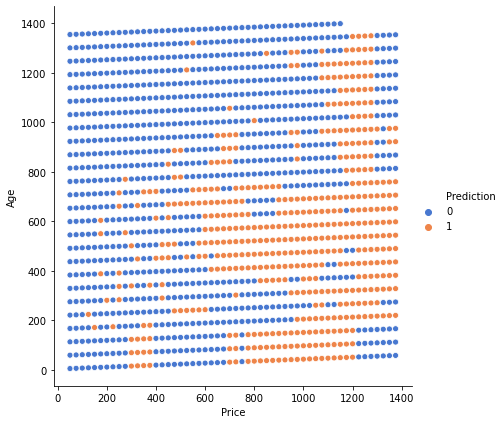

In [48]:
import seaborn as sns
#sns.set_theme(style="white") # not recognized by older versions of seaborn

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Price", y="Age", hue="Prediction",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=mydf);

Now we can finally start making sense of our data. A user's propensity to click on a banner ad correlates with both age and device price. Users of devices that are more expensive are more likely to click. This is even more true if the device has been released for less than two years.

This is good knowledge, but now we have another problem. How do we put this into production? We know that a user with a recently-released high-end device is more likely to click on a banner ad. Yet, the chances that the user actually click are still tony. What we could use here is a model that gives us an indication of a probability that a user clicks. This could be used, for example, as part of an OpenRTB auction, to decide whether our company wants to bid on a certain user session or not.

For example, a 3% chance might not be good enough for us, while a 6% chance might be, in spite of the fact that the user is still morelikely to avoid engagement.

Is there a way we can have our model provide that kind of indication? `RandomForestClassifier` is still our friend.

In [49]:
#from sklearn.ensemble import RandomForestClassifier

# no class_weight this time (NW = No class Weight)
rfsNW = RandomForestClassifier(n_jobs=3)

rfsNW.fit(Xs_train, ys_train)

score2sNW = rfsNW.score(Xs_test, ys_test)

print(f'Random Forest accuracy score = {score2sNW*100}')

Random Forest accuracy score = 98.79835674084268


In [50]:
rfsNW_predict = rfsNW.predict(Xs_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfsNW_predict)*100)
print('Accuracy score:',accuracy_score(y_test, rfsNW_predict)*100)
print('F1 score:',f1_score(y_test, rfsNW_predict)*100)

ROCAUC score: 49.999797565932774
Accuracy score: 98.80075682724578
F1 score: 0.0


As expected, we have 98% accuracy, which means that the model is predicting `0`s all the way.

In [51]:
rfsNW_predict = rfsNW.predict(Xs_test)
display(rfsNW_predict)

# a nd Yes, they are all zero
display(np.array_equal(rfsNW_predict,np.zeros(len(rfsNW_predict))))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

False

In [52]:
# Load the example dataset
df1 = pd.DataFrame(mytestdata, columns =['Age', 'Price']) 
# let's load df2 with the new prediction
df2 = pd.DataFrame(rfsNW.predict(df1), columns =['Prediction'])
mydf = pd.concat([df1,df2], axis=1)

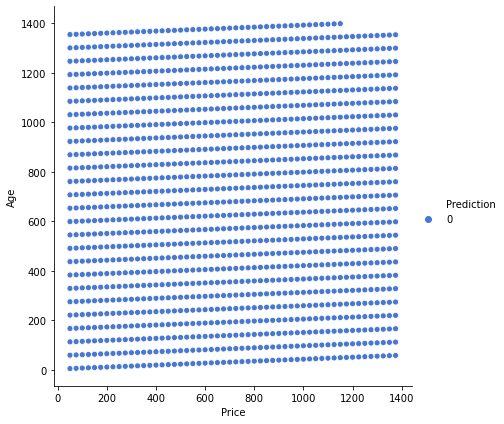

In [53]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Price", y="Age", hue="Prediction",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=mydf);

But there is something serendipitious going on with the `RandomForestClassifier`, `predict_proba()` method.

**Note:** The following cell is added to help you make sense of how the probabilities are represented in the value consumed and returned by `predict_proba()`. Real action happens in the cell after that.

In [54]:
display([mytestdata[22]])
display(rfsNW.predict_proba([mytestdata[22]]))
display(rfsNW.predict_proba([mytestdata[22]])[0])

[[27, 600]]

array([[0.99511999, 0.00488001]])

array([0.99511999, 0.00488001])

In [55]:
print("age(days),Price(USD)  => proba [ 0    1]")
for i in mytestdata[22:50]:
    print(str(i[0]) + "       ,   " + str(i[1]) + "      =>  " + 
          str(np.round(rfsNW.predict_proba([i])[0]*100,2)))

age(days),Price(USD)  => proba [ 0    1]
27       ,   600      =>  [99.51  0.49]
28       ,   625      =>  [99.37  0.63]
29       ,   650      =>  [99.11  0.89]
30       ,   675      =>  [98.91  1.09]
31       ,   700      =>  [89.59 10.41]
32       ,   725      =>  [87.3 12.7]
33       ,   750      =>  [95.5  4.5]
34       ,   775      =>  [95.71  4.29]
35       ,   800      =>  [94.61  5.39]
36       ,   825      =>  [93.98  6.02]
37       ,   850      =>  [94.25  5.75]
38       ,   875      =>  [94.78  5.22]
39       ,   900      =>  [93.71  6.29]
40       ,   925      =>  [94.22  5.78]
41       ,   950      =>  [94.25  5.75]
42       ,   975      =>  [92.73  7.27]
43       ,   1000      =>  [90.45  9.55]
44       ,   1025      =>  [86.09 13.91]
45       ,   1050      =>  [91.69  8.31]
46       ,   1075      =>  [91.59  8.41]
47       ,   1100      =>  [91.95  8.05]
48       ,   1125      =>  [92.51  7.49]
49       ,   1150      =>  [92.03  7.97]
50       ,   1175      =>  [91.12  8

The second figure provides an estimate of the probability that a user clicks on a banner based on their device. We can decide that we are interested in events where that figure is 5% or above, or 8% or above.

## Production

The model we have obtained is arguably good enough for production. We could stop our tutorial on how to integrate WURFL with Machine Learning here. We have shown how web and mobile traffic data can be augmented opening up to new insight.

In [56]:
import csv

df_coded.to_csv("data_age_price_in_tsv_format.tsv.gz", sep="\t", quoting=csv.QUOTE_NONE, compression='gzip')